In [18]:
install.packages("rpart.plot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [20]:
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(corrplot)

In [21]:
# Load data

In [22]:
trainRaw <- read.csv('pml-training.csv')
testRaw <- read.csv('pml-testing.csv')
dim(trainRaw)
dim(testRaw)

[1] 19622   160

[1]  20 160

In [23]:
sum(complete.cases(trainRaw))

[1] 406

In [24]:
trainRaw <- trainRaw[, colSums(is.na(trainRaw)) == 0] 
testRaw <- testRaw[, colSums(is.na(testRaw)) == 0] 

In [25]:
classe <- trainRaw$classe
trainRemove <- grepl("^X|timestamp|window", names(trainRaw))
trainRaw <- trainRaw[, !trainRemove]
trainCleaned <- trainRaw[, sapply(trainRaw, is.numeric)]
trainCleaned$classe <- classe
testRemove <- grepl("^X|timestamp|window", names(testRaw))
testRaw <- testRaw[, !testRemove]
testCleaned <- testRaw[, sapply(testRaw, is.numeric)]

In [26]:
inTrain <- createDataPartition(trainCleaned$classe, p=0.70, list=F)
trainData <- trainCleaned[inTrain, ]
testData <- trainCleaned[-inTrain, ]

In [27]:
controlRf <- trainControl(method="cv", 5)
modelRf <- train(classe ~ ., data=trainData, method="rf", trControl=controlRf, sampsize=1000, ntree=5)
modelRf

Random Forest 

13737 samples
   52 predictor
    5 classes: 'A', 'B', 'C', 'D', 'E' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 10989, 10989, 10990, 10990, 10990 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8153885  0.7661383
  27    0.8831629  0.8521208
  52    0.8847637  0.8541585

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 52. 

In [28]:
predictRf <- predict(modelRf, testData)
confusionMatrix(testData$classe, predictRf)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1539   52   23   36   24
         B  104  900   69   46   20
         C   13   72  878   40   23
         D   16   20   58  852   18
         E   12   41   28   26  975

Overall Statistics
                                          
               Accuracy : 0.8741          
                 95% CI : (0.8653, 0.8825)
    No Information Rate : 0.2862          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8408          
 Mcnemar's Test P-Value : 3.767e-08       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9139   0.8295   0.8314   0.8520   0.9198
Specificity            0.9679   0.9502   0.9694   0.9771   0.9778
Pos Pred Value         0.9194   0.7902   0.8558   0.8838   0.9011
Neg Pred Value         0.9656   0.9610   0.9634   0.9699   0.9823
Prevalence    

In [29]:
accuracy <- postResample(predictRf, testData$classe)
accuracy
oose <- 1 - as.numeric(confusionMatrix(testData$classe, predictRf)$overall[1])
oose

Accuracy     Kappa 
0.8740867 0.8407544

[1] 0.1259133

In [30]:
result <- predict(modelRf, testCleaned[, -length(names(testCleaned))])
result

[1] B A A A A E D B A A B C E A E E A B A B
Levels: A B C D E

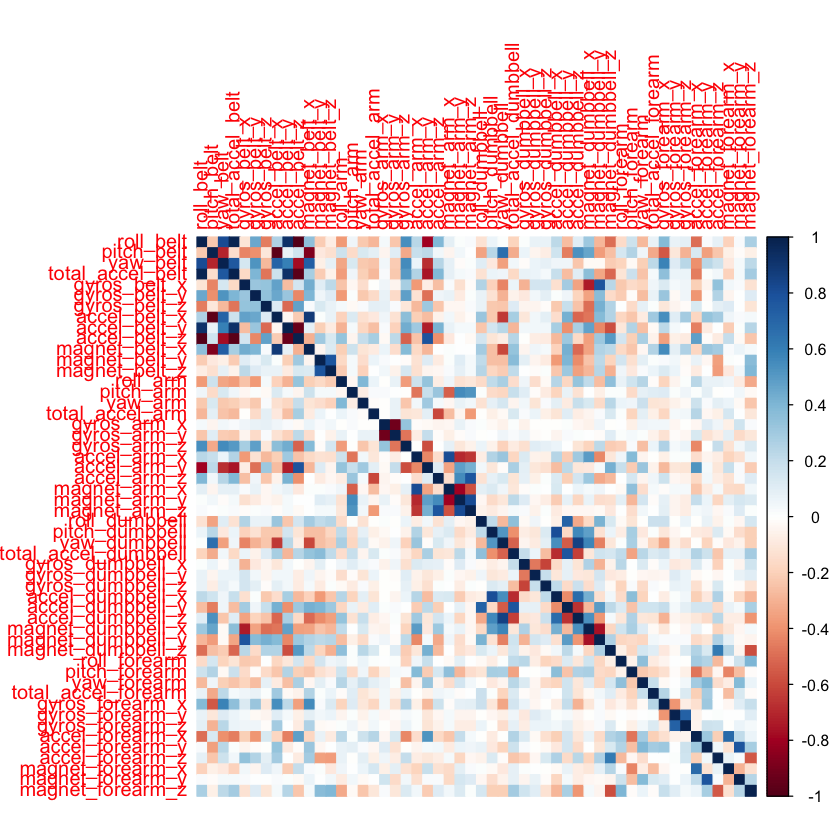

In [31]:
corrPlot <- cor(trainData[, -length(names(trainData))])
corrplot(corrPlot, method="color")

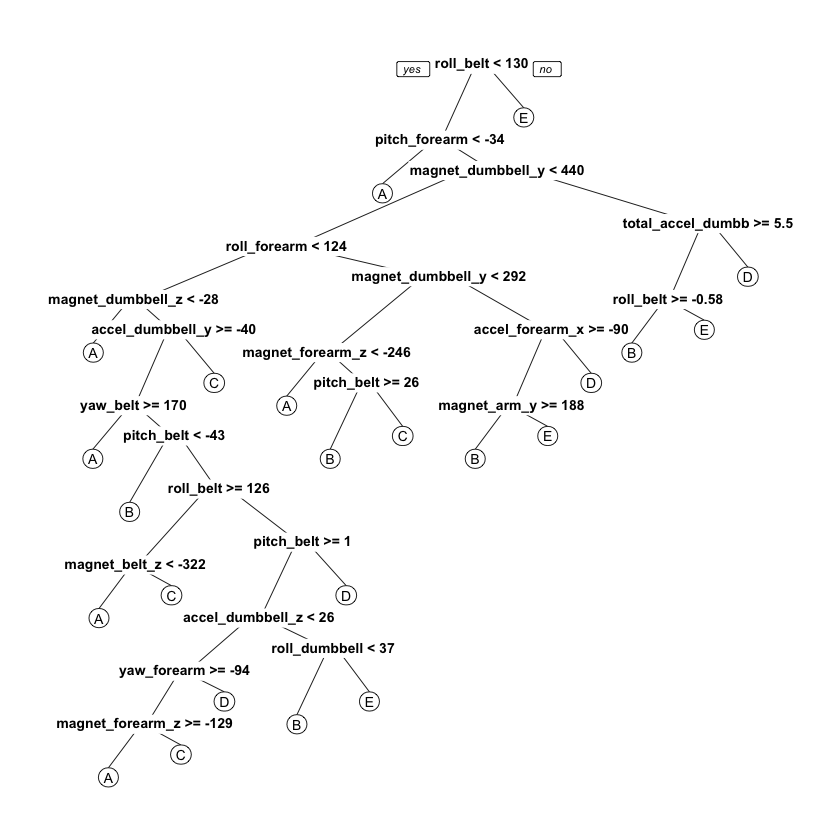

In [32]:
treeModel <- rpart(classe ~ ., data=trainData, method="class")
prp(treeModel) # fast plot